In [22]:
#读取数据
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np                           
import pandas as pd                       #能快速读取常规大小的文件。Pandas能提供高性能、易用的数据结构和数据分析工具
from sklearn.utils import shuffle             #随机打乱工具，将原有序列打乱，返回一个全新的顺序错乱的值

In [23]:
#读取数据文件
df = pd.read_csv("solo_train_processed.csv",header=0)
df_test = pd.read_csv("test.csv",header=0)
#显示数据描述信息
# print(df.describe())
# print(df)


#数据准备

#获取df的值
df = df.values
df_test = df_test.values

#把df转换成np的数组格式
df = np.array(df)
df_test = np.array(df_test)
print(df)
print(df_test)
#特征数据归一化
#对特征数据{0到11}列 做（0-1）归一化
for i in range(16):
    df[:,i] = (df[:,i]-df[:,i].min())/(df[:,i].max()-df[:,i].min())
    df_test[:,i] = (df_test[:,i]-df_test[:,i].min())/(df_test[:,i].max()-df_test[:,i].min())
    
    
#x_data为归一化后的前12列特征数据
x_data = df[:,:16]
x__data_test = df_test[:,:16]
#y_data为最后1列标签数据
y_data = df[:,16]
y__data_test = df_test[:,16]
#模型定义

#定义特征数据和标签数据的占位符
#shape中None表示行的数量未知，在实际训练时决定一次带入多少行样本，从一个样本的随机SDG到批量SDG都可以
x = tf.placeholder(tf.float32,[None,16],name = "X")          #12个特征数据（12列）
y = tf.placeholder(tf.float32,[None,1],name = "Y")           #1个标签数据（1列）
#中间层
Weights_L1 = tf.Variable(tf.random_normal([16,20],stddev=0.01))
biases_L1 = tf.Variable(tf.zeros([1,20]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.tanh(Wx_plus_b_L1)
#定义模型函数
#定义了一个命名空间.

w = tf.Variable(tf.random_normal([20,1]))
b = tf.Variable(tf.zeros([1,20]))
Wx_plus_b_L2 = tf.matmul(L1,w) + b
pred = tf.nn.relu(Wx_plus_b_L2)
    
    # w和x是矩阵相乘，用matmul,不能用mutiply或者*

[[1.000e+00 1.000e+02 0.000e+00 ... 6.000e+00 1.519e+03 7.216e-01]
 [0.000e+00 1.781e+01 0.000e+00 ...       nan       nan       nan]
 [1.000e+00 1.000e+02 0.000e+00 ...       nan       nan       nan]
 ...
 [0.000e+00 3.158e+02 0.000e+00 ...       nan       nan       nan]
 [1.000e+00 3.490e+02 0.000e+00 ...       nan       nan       nan]
 [0.000e+00 9.537e-01 0.000e+00 ...       nan       nan       nan]]
[[1.000e+00 4.743e+01 0.000e+00 ... 1.415e+03 6.000e+00 7.216e-01]
 [3.000e+00 5.065e+02 1.000e+00 ... 2.332e+03 6.000e+00 8.763e-01]
 [5.000e+00 7.166e+02 2.000e+00 ... 2.694e+03 5.000e+00 8.804e-01]
 ...
 [7.000e+00 2.941e+02 0.000e+00 ... 3.148e+03 3.000e+00 9.694e-01]
 [0.000e+00 1.010e+02 0.000e+00 ... 3.862e+02 3.000e+00 4.301e-01]
 [1.000e+00 4.415e+01 0.000e+00 ... 8.170e+01 6.000e+00 2.935e-01]]


In [24]:
#模型训练

#设置训练超参数
#迭代轮次
train_epochs = 5

#学习率
learning_rate = 0.01

#定义均方差损失函数
#定义损失函数
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred,2))    #均方误差
    
#创建优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

#声明会话
sess = tf.Session()

#定义初始化变量的操作
init = tf.global_variables_initializer()

#启动会话
sess.run(init)

#迭代训练
for epoch in range(train_epochs):
    loss_sum = 0.0
    for xs,ys in zip(x_data,y_data):
        
        xs = xs.reshape(1,16)
        ys = ys.reshape(1,1)
        #feed数据必须和Placeholder的shape一致
        #_,loss = sess.run(optimizer,feed_dict={x:xs,y:ys})
        _,loss = sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        #loss_sum = loss_sum + loss
    #打乱数据顺序，防止按原次序假性训练输出
    x_data,y_data = shuffle(x_data,y_data)
    
    b0temp = b.eval(session=sess)            #训练中当前变量b值
    w0temp = w.eval(session=sess)            #训练中当前权重w值
    loss_average = loss_sum/len(y_data)      #当前训练中的平均损失
    
    print("epoch=",epoch+1,"loss=",loss_average,"b=",b0temp,"w=",w0temp)
    #print("epoch=",epoch+1)

epoch= 1 loss= 0.0 b= [[-0.00535156 -0.00535156 -0.00535156 -0.00535156 -0.00535156 -0.00535156
  -0.00535156 -0.00535156 -0.00535156 -0.00535156 -0.00535156 -0.00535156
  -0.00535156 -0.00535156 -0.00535156 -0.00535156 -0.00535156 -0.00535156
  -0.00535156 -0.00535156]] w= [[-0.01630757]
 [ 0.3260797 ]
 [-0.20211573]
 [ 0.11170299]
 [-0.15564221]
 [ 0.05005893]
 [ 0.42429772]
 [-0.8599216 ]
 [ 0.2949156 ]
 [ 1.1751977 ]
 [-0.1982466 ]
 [-0.4430633 ]
 [-0.6681497 ]
 [-0.4951026 ]
 [-0.39145398]
 [-0.22885372]
 [-0.27504423]
 [ 0.09951799]
 [ 1.0825098 ]
 [-0.5490169 ]]
epoch= 2 loss= 0.0 b= [[-0.01099346 -0.01099346 -0.01099346 -0.01099346 -0.01099346 -0.01099346
  -0.01099346 -0.01099346 -0.01099346 -0.01099346 -0.01099346 -0.01099346
  -0.01099346 -0.01099346 -0.01099346 -0.01099346 -0.01099346 -0.01099346
  -0.01099346 -0.01099346]] w= [[-0.01269469]
 [ 0.21813479]
 [-0.1267716 ]
 [ 0.07275604]
 [-0.09645582]
 [ 0.02969001]
 [ 0.2956362 ]
 [-0.62213486]
 [ 0.19295277]
 [ 1.1252475 ]

<IPython.core.display.Javascript object>


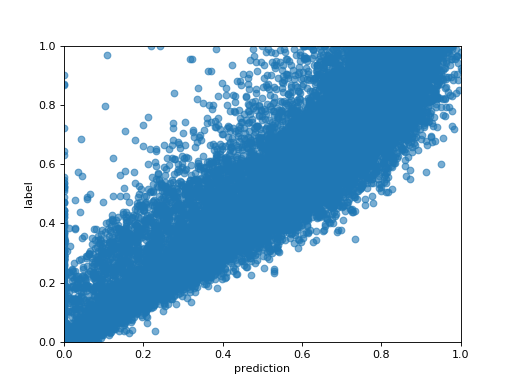

In [25]:
#模型应用
#n = np.random.randint(100000)       #随机确定一条来看看效果
#print(n)
row=len(df_test)
pre=np.zeros(row)
#pre=np.array([])
tar=np.zeros(row)
for n in range(1,row):
    
    x_test = x__data_test[n]
    x_test = x_test.reshape(1,16)

    predict = sess.run(pred,feed_dict={x:x_test})
    pre[n]=predict[:,1]
    #print("预测值：%f"%predict)

    target_label = y__data_test[n]
    tar[n]=target_label
    #print("标签值：%f"%target_label)
plt.xlabel('prediction')
plt.ylabel('label')
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(pre,tar,alpha=0.6)
plt.show()

In [27]:
gp=np.array([3.60103957e-02, 4.21900339e-02, 7.91258458e-03, 1.56550314e-02,
       4.88791049e-01, 2.84476168e-02, 3.16502973e-02, 9.17873625e-03,
       8.77788782e-01, 8.48023653e-01, 2.09996104e-02, 3.01431806e-04,
       9.47059039e-03, 1.50715897e-03, 6.82229474e-02, 1.80630043e-01])
gp=gp.reshape(1,16)
predict = sess.run(pred,feed_dict={x:gp})
print(predict)

[[0.51242805 0.51242805 0.51242805 0.51242805 0.51242805 0.51242805
  0.51242805 0.51242805 0.51242805 0.51242805 0.51242805 0.51242805
  0.51242805 0.51242805 0.51242805 0.51242805 0.51242805 0.51242805
  0.51242805 0.51242805]]


In [28]:
gp=np.array([0.13086095, 0.12589401, 0.03730806, 0.06479481, 0.22705032,
       0.11660279, 0.08742729, 0.05412586, 0.8593567 , 0.83328861,
       0.04029142, 0.00460653, 0.01664542, 0.00575816, 0.13102975,
       0.22627918])
gp=gp.reshape(1,16)
predict = sess.run(pred,feed_dict={x:gp})
print(predict)

[[0.6660621 0.6660621 0.6660621 0.6660621 0.6660621 0.6660621 0.6660621
  0.6660621 0.6660621 0.6660621 0.6660621 0.6660621 0.6660621 0.6660621
  0.6660621 0.6660621 0.6660621 0.6660621 0.6660621 0.6660621]]


In [29]:
gp=np.array([4.29475633e-03, 1.73130743e-02, 1.18670880e-03, 1.93956681e-03,
       7.87274241e-01, 4.08755289e-03, 4.90506040e-03, 6.14204386e-04,
       8.69086564e-01, 8.42708945e-01, 1.95568614e-03, 0.00000000e+00,
       4.25542938e-04, 7.91139260e-04, 9.50388890e-03, 6.91734999e-02])
gp=gp.reshape(1,16)
predict = sess.run(pred,feed_dict={x:gp})
print(predict)

[[0.16490674 0.16490674 0.16490674 0.16490674 0.16490674 0.16490674
  0.16490674 0.16490674 0.16490674 0.16490674 0.16490674 0.16490674
  0.16490674 0.16490674 0.16490674 0.16490674 0.16490674 0.16490674
  0.16490674 0.16490674]]


In [30]:
gp=np.array([0.35304439, 0.35991532, 0.16222678, 0.1073508 , 0.04523375,
       0.369991  , 0.11748618, 0.16189931, 0.86987704, 0.84169787,
       0.06418613, 0.01038251, 0.01529602, 0.04371585, 0.17798644,
       0.252910322])
gp=gp.reshape(1,16)
predict = sess.run(pred,feed_dict={x:gp})
print(predict[:,1])

[0.83061904]
